<a href="https://colab.research.google.com/github/jlsm2/deeplearning/blob/main/cc_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento dos dados

### Download de bibliotecas

In [29]:
!pip install d2l==1.0.3 -q

In [30]:
pip install pandas numpy scikit-learn seaborn matplotlib -q

### Importando bibliotecas

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### Carregando o dataset

In [32]:
dfTrain = pd.read_csv("fraudTrain.csv")
dfTest = pd.read_csv("fraudTest.csv")

dfTrain

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


### Removendo colunas irrelevantes

In [33]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [34]:
dfTrain = dfTrain.drop(columns=["Unnamed: 0", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"])
dfTest = dfTest.drop(columns=["Unnamed: 0", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"])

### Verificando se há valores nulos

In [35]:
print(dfTrain.isnull().sum())
print(dfTest.isnull().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
job                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
job                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### Convertendo colunas de data

In [36]:
# train dataframe
dfTrain["trans_date_trans_time"] = pd.to_datetime(dfTrain["trans_date_trans_time"])

dfTrain["year"] = dfTrain["trans_date_trans_time"].dt.year
dfTrain["month"] = dfTrain["trans_date_trans_time"].dt.month
dfTrain["day"] = dfTrain["trans_date_trans_time"].dt.day
dfTrain["day_of_week"] = dfTrain["trans_date_trans_time"].dt.dayofweek
dfTrain["hour"] = dfTrain["trans_date_trans_time"].dt.hour

dfTrain.drop(columns=["trans_date_trans_time"], inplace=True)

# test dataframe
dfTest["trans_date_trans_time"] = pd.to_datetime(dfTest["trans_date_trans_time"])

dfTest["year"] = dfTest["trans_date_trans_time"].dt.year
dfTest["month"] = dfTest["trans_date_trans_time"].dt.month
dfTest["day"] = dfTest["trans_date_trans_time"].dt.day
dfTest["day_of_week"] = dfTest["trans_date_trans_time"].dt.dayofweek
dfTest["hour"] = dfTest["trans_date_trans_time"].dt.hour

dfTest.drop(columns=["trans_date_trans_time"], inplace=True)


dfTrain

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,year,month,day,day_of_week,hour
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,2019,1,1,1,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,2019,1,1,1,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,2019,1,1,1,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,2019,1,1,1,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,2019,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0,2020,6,21,6,12
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0,2020,6,21,6,12
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0,2020,6,21,6,12
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0,2020,6,21,6,12


### Identificando e tratando variáveis categoricas

In [37]:
categorical_cols = dfTrain.select_dtypes(include=["object", "category"]).columns
print(categorical_cols)

Index(['merchant', 'category', 'gender', 'job'], dtype='object')


In [38]:
dfTrain["merchant"] = dfTrain["merchant"].astype("category")
dfTrain["category"] = dfTrain["category"].astype("category")
dfTrain["gender"] = dfTrain["gender"].astype("category")
dfTrain["job"] = dfTrain["job"].astype("category")

dfTest["merchant"] = dfTest["merchant"].astype("category")
dfTest["category"] = dfTest["category"].astype("category")
dfTest["gender"] = dfTest["gender"].astype("category")
dfTest["job"] = dfTest["job"].astype("category")

In [39]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   merchant     1296675 non-null  category
 1   category     1296675 non-null  category
 2   amt          1296675 non-null  float64 
 3   gender       1296675 non-null  category
 4   lat          1296675 non-null  float64 
 5   long         1296675 non-null  float64 
 6   city_pop     1296675 non-null  int64   
 7   job          1296675 non-null  category
 8   unix_time    1296675 non-null  int64   
 9   merch_lat    1296675 non-null  float64 
 10  merch_long   1296675 non-null  float64 
 11  is_fraud     1296675 non-null  int64   
 12  year         1296675 non-null  int32   
 13  month        1296675 non-null  int32   
 14  day          1296675 non-null  int32   
 15  day_of_week  1296675 non-null  int32   
 16  hour         1296675 non-null  int32   
dtypes: category(4), float64(5),

In [40]:
# label encoder
le = LabelEncoder()

dfTrain["merchant"] = le.fit_transform(dfTrain["merchant"])
dfTrain["category"] = le.fit_transform(dfTrain["category"])
dfTrain["gender"] = le.fit_transform(dfTrain["gender"])
dfTrain["job"] = le.fit_transform(dfTrain["job"])

dfTest["merchant"] = le.fit_transform(dfTest["merchant"])
dfTest["category"] = le.fit_transform(dfTest["category"])
dfTest["gender"] = le.fit_transform(dfTest["gender"])
dfTest["job"] = le.fit_transform(dfTest["job"])

In [41]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   merchant     1296675 non-null  int64  
 1   category     1296675 non-null  int64  
 2   amt          1296675 non-null  float64
 3   gender       1296675 non-null  int64  
 4   lat          1296675 non-null  float64
 5   long         1296675 non-null  float64
 6   city_pop     1296675 non-null  int64  
 7   job          1296675 non-null  int64  
 8   unix_time    1296675 non-null  int64  
 9   merch_lat    1296675 non-null  float64
 10  merch_long   1296675 non-null  float64
 11  is_fraud     1296675 non-null  int64  
 12  year         1296675 non-null  int32  
 13  month        1296675 non-null  int32  
 14  day          1296675 non-null  int32  
 15  day_of_week  1296675 non-null  int32  
 16  hour         1296675 non-null  int32  
dtypes: float64(5), int32(5), int64(7)
memory usage

### Padronizando features numéricas

In [42]:
numeric_features = ["amt", "lat", "long", "city_pop", "unix_time", "year", "month", "day", "day_of_week", "hour"]

scaler = StandardScaler()

dfTrain[numeric_features] = scaler.fit_transform(dfTrain[numeric_features])
dfTest[numeric_features] = scaler.fit_transform(dfTest[numeric_features])

In [43]:
dfTrain

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,year,month,day,day_of_week,hour
0,514,8,-0.407826,0,-0.484420,0.657620,-0.282589,370,-1.858664,36.011293,-82.048315,0,-0.634065,-1.504564,-1.652258,-0.941975,-1.878145
1,241,4,0.230039,0,2.039120,-2.033870,-0.293670,428,-1.858662,49.159047,-118.186462,0,-0.634065,-1.504564,-1.652258,-0.941975,-1.878145
2,390,0,0.934149,1,0.717754,-1.601537,-0.280406,307,-1.858662,43.150704,-112.154481,0,-0.634065,-1.504564,-1.652258,-0.941975,-1.878145
3,360,2,-0.158132,1,1.515617,-1.590766,-0.287742,328,-1.858660,47.034331,-112.561071,0,-0.634065,-1.504564,-1.652258,-0.941975,-1.878145
4,297,9,-0.177094,1,-0.023035,0.782279,-0.293835,116,-1.858651,38.674999,-78.632459,0,-0.634065,-1.504564,-1.652258,-0.941975,-1.878145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,-0.341769,1,-0.161575,-1.617214,-0.293309,215,1.757855,36.841266,-111.690765,0,1.577126,-0.041592,0.612974,1.332663,-0.118052
1296671,2,1,-0.116339,1,0.143638,0.924207,-0.293832,360,1.757855,38.906881,-78.246528,0,1.577126,-0.041592,0.612974,1.332663,-0.118052
1296672,599,1,0.221930,1,-1.102883,-1.133257,-0.291186,308,1.757856,33.619513,-105.130529,0,1.577126,-0.041592,0.612974,1.332663,-0.118052
1296673,509,1,0.028375,1,0.948613,-0.895029,-0.290434,485,1.757861,42.788940,-103.241160,0,1.577126,-0.041592,0.612974,1.332663,-0.118052


In [44]:
dfTest

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,year,month,day,day_of_week,hour
0,319,10,-0.424463,1,-0.904377,0.677451,0.816521,275,-1.703871,33.986391,-81.200714,0,0.0,-1.773597,0.506526,1.502388,-0.118789
1,591,10,-0.252337,0,0.351182,-1.472454,-0.292685,392,-1.703869,39.450498,-109.960431,0,0.0,-1.773597,0.506526,1.502388,-0.118789
2,611,5,-0.179353,0,0.420768,1.216667,-0.178853,259,-1.703865,40.495810,-74.196111,0,0.0,-1.773597,0.506526,1.502388,-0.118789
3,222,9,-0.059605,1,-1.970539,0.685934,-0.111371,407,-1.703861,28.812398,-80.883061,0,0.0,-1.773597,0.506526,1.502388,-0.118789
4,292,13,-0.422358,1,1.128092,0.380004,-0.289942,196,-1.703861,44.959148,-85.884734,0,0.0,-1.773597,0.506526,1.502388,-0.118789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,-0.163467,1,0.385244,-0.120967,-0.291963,460,1.510350,39.946837,-91.333331,0,0.0,1.259458,1.623183,0.125407,1.496265
555715,264,7,0.270803,1,-1.877757,-0.379599,-0.198018,198,1.510351,29.661049,-96.186633,0,0.0,1.259458,1.623183,0.125407,1.496265
555716,496,7,0.111564,0,1.512121,-2.089408,-0.281427,294,1.510352,46.658340,-119.715054,0,0.0,1.259458,1.623183,0.125407,1.496265
555717,75,13,-0.391735,1,1.201709,-1.910685,-0.293261,58,1.510354,44.470525,-117.080888,0,0.0,1.259458,1.623183,0.125407,1.496265


### Identificando e tratando outliers


In [45]:
# train

# identificação dos outliers
Q1 = dfTrain["amt"].quantile(0.25)
Q3 = dfTrain["amt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dfTrain[(dfTrain["amt"] < lower_bound) | (dfTrain["amt"] > upper_bound)]

# remoção
dfTrain_cleaned = dfTrain[(dfTrain["amt"] >= lower_bound) & (dfTrain["amt"] <= upper_bound)]

# substituicao de valores
dfTrain["amt"] = np.where(dfTrain["amt"] < lower_bound, lower_bound, dfTrain["amt"])
dfTrain["amt"] = np.where(dfTrain["amt"] > upper_bound, upper_bound, dfTrain["amt"])

# transformação de dados
dfTrain["amt"] = np.log(dfTrain["amt"] + 1)  # somar 1 para evitar log(0)

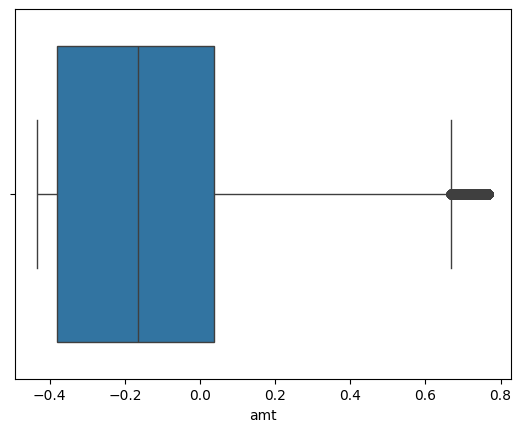

In [46]:
sns.boxplot(x=dfTrain_cleaned["amt"])
plt.show()

In [47]:
# test

# identificação dos outliers
Q1 = dfTest["amt"].quantile(0.25)
Q3 = dfTest["amt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dfTest[(dfTest["amt"] < lower_bound) | (dfTest["amt"] > upper_bound)]

# remoção
dfTest_cleaned = dfTest[(dfTest["amt"] >= lower_bound) & (dfTest["amt"] <= upper_bound)]

# substituicao de valores
dfTest["amt"] = np.where(dfTest["amt"] < lower_bound, lower_bound, dfTest["amt"])
dfTest["amt"] = np.where(dfTest["amt"] > upper_bound, upper_bound, dfTest["amt"])

# transformação de dados
dfTest["amt"] = np.log(dfTest["amt"] + 1)  # somar 1 para evitar log(0)

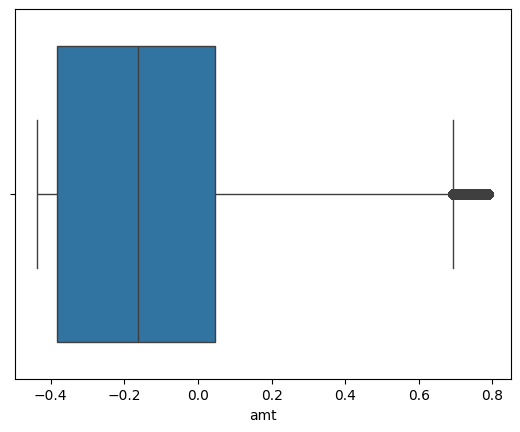

In [48]:
sns.boxplot(x=dfTest_cleaned["amt"])
plt.show()

### Divisão dos dados

In [49]:
X_train = dfTrain.drop(columns=["is_fraud"])
y_train = dfTrain["is_fraud"]

X_test = dfTest.drop(columns=["is_fraud"])
y_test = dfTest["is_fraud"]

# Criação e treinamento dos modelos

### Random Forest

In [50]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9973709734596082


### LSTM

In [51]:
# redimensionando os dados
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [52]:
# criando o modelo
class LSTM(nn.Module):
    def __init__(self, input_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, 64, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

input_size = X_train.shape[2]
model = LSTM(input_size)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [53]:
# treinamento
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def calculate_accuracy(outputs, labels):
    predicted = (outputs > 0.5).float()
    correct = (predicted == labels).float()
    return correct.sum() / len(correct)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_accuracy += calculate_accuracy(outputs, labels).item()

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = running_accuracy / len(train_loader)
    print(f'Época [{epoch + 1}/{num_epochs}], Perda: {avg_loss:.4f}, Acurácia: {avg_accuracy:.4f}')

Época [1/10], Perda: 0.0367, Acurácia: 0.9941


KeyboardInterrupt: 